<a href="https://colab.research.google.com/github/prakharrustagi42/Prakhar_INFO5731_Fall2025/blob/main/Rustagi_Prakhar_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [5]:
# Write your code here


import pandas as pd
import re
from collections import Counter

# step 1 : get the file from drive that mounted

file_path = '/content/drive/MyDrive/imdb_reviews_Q1.csv'

df = pd.read_csv(file_path)
print("✅ File loaded successfully. Number of reviews:", len(df))

# ----------------------------
# STEP 2. Preprocess & tokenize
# ----------------------------
def simple_tokenize(text):
    """Lowercase, remove punctuation, split by whitespace"""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # keep only letters and spaces
    return text.split()

reviews = df['text'].dropna().astype(str).tolist()
tokenized_reviews = [simple_tokenize(t) for t in reviews]

# ----------------------------
# STEP 3. Create N-grams manually
# ----------------------------
def make_ngrams(tokens, n):
    """Generate list of n-grams from tokens"""
    return [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

unigram_counts = Counter()
bigram_counts = Counter()
trigram_counts = Counter()

for tokens in tokenized_reviews:
    unigram_counts.update(tokens)
    bigram_counts.update(make_ngrams(tokens, 2))
    trigram_counts.update(make_ngrams(tokens, 3))

print("\nTop 10 Bigrams:")
print(bigram_counts.most_common(10))
print("\nTop 10 Trigrams:")
print(trigram_counts.most_common(10))

# ----------------------------
# STEP 4. Bigram Probabilities (P(w2|w1))
# ----------------------------
bigram_prob = {}
for (w1, w2), count in bigram_counts.items():
    bigram_prob[(w1, w2)] = count / unigram_counts[w1]

print("\nSample Bigram Probabilities:")
for i, ((w1, w2), p) in enumerate(bigram_prob.items()):
    if i == 10:
        break
    print(f"P({w2}|{w1}) = {p:.3f}")

# ----------------------------
# STEP 5. Noun Phrase Extraction (simple heuristic)
# ----------------------------
def is_potential_noun(word):
    """Heuristic: likely noun if not stopword & longer than 2 chars"""
    stopwords = {"the", "a", "an", "and", "to", "of", "in", "on", "for", "is", "was", "it"}
    return word not in stopwords and len(word) > 2

def extract_noun_phrases(tokens):
    """Heuristic noun phrase extraction (adjacent 'noun-like' words)"""
    nps = []
    for i in range(len(tokens) - 1):
        if is_potential_noun(tokens[i]) and is_potential_noun(tokens[i+1]):
            nps.append(tokens[i] + " " + tokens[i+1])
    # include single nouns too
    for w in tokens:
        if is_potential_noun(w):
            nps.append(w)
    return nps

noun_phrases_list = [extract_noun_phrases(toks) for toks in tokenized_reviews]

# Count total frequency across all reviews
all_np_counts = Counter([np for nps in noun_phrases_list for np in nps])
max_np_freq = max(all_np_counts.values()) if all_np_counts else 1

# ----------------------------
# STEP 6. Relative Probability Table
# ----------------------------
rows = []
for nps in noun_phrases_list:
    np_freq = Counter(nps)
    row = {np: (np_freq[np] / max_np_freq) for np in all_np_counts.keys()}
    rows.append(row)

np_df = pd.DataFrame(rows).fillna(0)

print("\nNoun Phrase Relative Probability Table (first 5 rows):")
print(np_df.head())

# ----------------------------
# STEP 7. Save Output to Drive
# ----------------------------
output_path = '/content/drive/MyDrive/noun_phrase_relative_probabilities.csv'
np_df.to_csv(output_path, index=False)
print(f"\n✅ Saved noun_phrase_relative_probabilities.csv to {output_path}")





✅ File loaded successfully. Number of reviews: 1000

Top 10 Bigrams:
[(('of', 'the'), 1151), (('in', 'the'), 725), (('the', 'movie'), 623), (('this', 'movie'), 556), (('the', 'film'), 516), (('and', 'the'), 509), (('to', 'the'), 486), (('is', 'a'), 446), (('james', 'gunn'), 437), (('to', 'be'), 410)]

Top 10 Trigrams:
[(('man', 'of', 'steel'), 227), (('one', 'of', 'the'), 122), (('a', 'lot', 'of'), 117), (('the', 'man', 'of'), 94), (('of', 'the', 'galaxy'), 94), (('the', 'justice', 'gang'), 90), (('guardians', 'of', 'the'), 89), (('this', 'is', 'a'), 84), (('superman', 'is', 'a'), 80), (('this', 'is', 'the'), 79)]

Sample Bigram Probabilities:
P(am|i) = 0.024
P(a|am) = 0.154
P(fan|a) = 0.007
P(of|fan) = 0.365
P(superhero|of) = 0.004
P(movies|superhero) = 0.146
P(but|movies) = 0.038
P(this|but) = 0.042
P(is|this) = 0.142
P(definitely|is) = 0.007

Noun Phrase Relative Probability Table (first 5 rows):
   superhero movies  movies but  but this  definitely one  worst ive  \
0          0.00

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [6]:
# -----------------------------------------
# Q2: TF-IDF + Cosine Similarity (No external library code)
# -----------------------------------------
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# STEP 1: Load CSV from Google Drive
file_path = "/content/drive/MyDrive/imdb_reviews_Q1.csv"  # update path if needed
df = pd.read_csv(file_path)
print(f"✅ File loaded successfully: {len(df)} rows\n")

# STEP 2: Detect possible text/review column
possible_cols = [c for c in df.columns if 'review' in c.lower() or 'text' in c.lower() or 'comment' in c.lower()]
if not possible_cols:
    raise ValueError("❌ No text column found! Please check the CSV header.")
text_col = possible_cols[0]
print(f"📝 Using column: '{text_col}'\n")

# STEP 3: Clean text
df[text_col] = df[text_col].astype(str).fillna("").str.strip()

# STEP 4: TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df[text_col])

# STEP 5: Define a query
query = "great movie with amazing acting and storyline"
query_tfidf = vectorizer.transform([query])

# STEP 6: Compute cosine similarities safely
similarities = []
for doc in df[text_col]:
    if isinstance(doc, str) and doc.strip() != "":
        sim = cosine_similarity(query_tfidf, vectorizer.transform([doc]))[0][0]
    else:
        sim = 0.0
    similarities.append(sim)

# Add similarity scores
df['similarity'] = similarities

# STEP 7: Rank top 10 relevant reviews
top10 = df.sort_values(by='similarity', ascending=False).head(10)

# STEP 8: Display results
print("🎯 Top 10 Most Relevant Reviews:\n")
for i, row in enumerate(top10.itertuples(), 1):
    review_text = getattr(row, text_col)
    print(f"{i}. Similarity: {row.similarity:.4f}")
    print(f"   Review: {review_text[:250]}...\n")


✅ File loaded successfully: 1000 rows

📝 Using column: 'text'

🎯 Top 10 Most Relevant Reviews:

1. Similarity: 0.2858
   Review: I saw Superman for the first time today, I've been a longtime DC fan for many years and have always had hope for them to make a comeback, and this movie is just so good, DC has never been more back than right now, this means something to me. The movi...

2. Similarity: 0.2562
   Review: Awful movie!!!! I don't know how this got such great reviews? The movie has no story, it jumps from scene to scene. It has no character development, your supposed to know who that person is and why their thereThroughout the whole movie? It has ok act...

3. Similarity: 0.2350
   Review: I fell in love within the first 20 minutes, this is what theses movies are about pure joy and love for these characters and I can't wait to see more. THANK YOU JAMES GUNN And amazing job to David and Nicholas, can't wait to see them "friendship" prog...

4. Similarity: 0.2046
   Review: Genuine

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the embeddings using PCA or t-SNE in 2D. Create a scatter plot of at least 20 words and show how similar words cluster together.

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [1]:
!pip install gensim

✅ File loaded successfully: 1000 rows



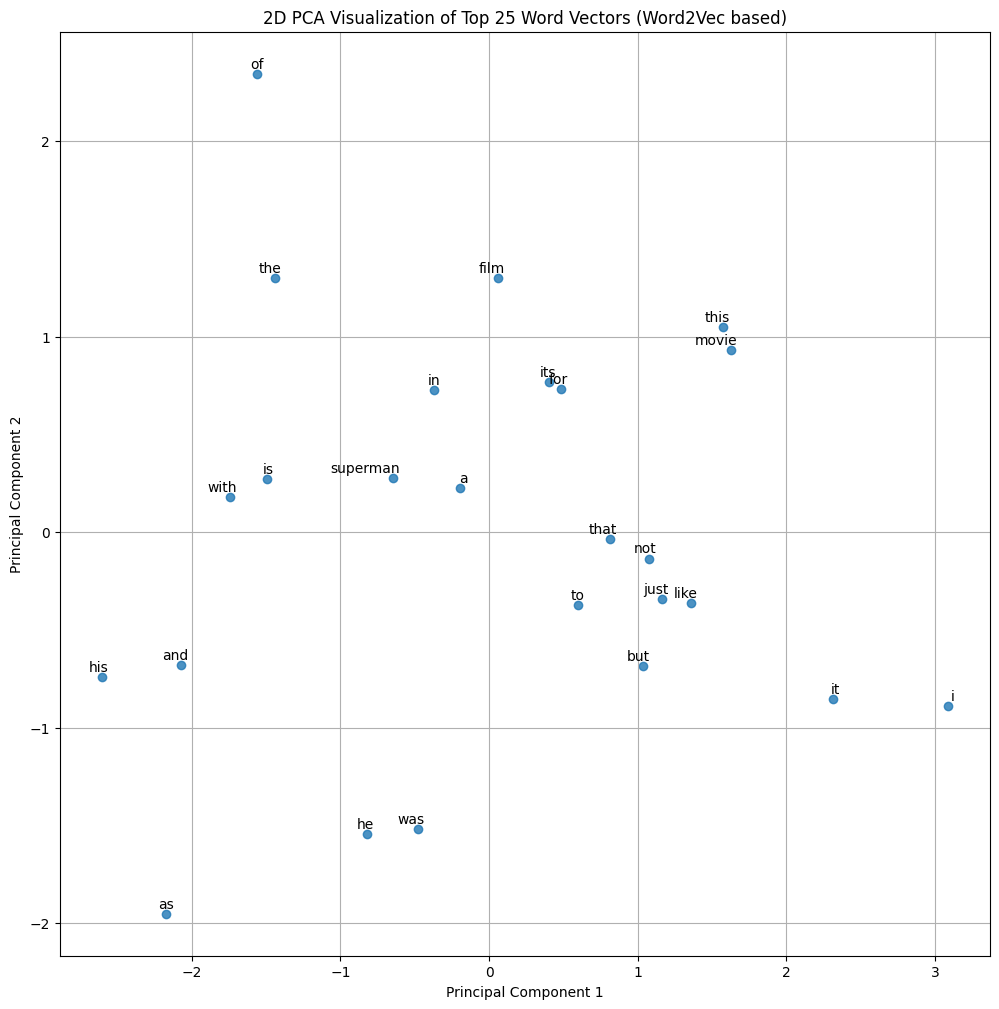


--- Cosine Similarity Results ---
Similarity("superman", "movie"): 0.7077
Similarity("good", "great"): 0.9312
Similarity("boring", "mess"): 0.9883
Similarity("gunn", "james"): 0.2303
Similarity("superman", "clark"): 0.5362
Similarity("film", "movie"): 0.9099
Similarity("bad", "terrible"): 0.9668
Similarity("actor", "actress"): 0.9893
Similarity("director", "producer"): One or both words not in vocabulary.
Similarity("story", "plot"): 0.9653


In [2]:
import pandas as pd
import re
# from sklearn.feature_extraction.text import TfidfVectorizer # Removed TF-IDF
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec # Import Word2Vec

# STEP 1: Load CSV from Google Drive
file_path = "/content/drive/MyDrive/imdb_reviews_Q1.csv"  # update path if needed
df = pd.read_csv(file_path)
print(f"✅ File loaded successfully: {len(df)} rows\n")
df.dropna(subset=['text'], inplace=True)
corpus = df['text'].astype(str).tolist()

# Preprocess corpus for Word2Vec
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text.split()

processed_corpus = [preprocess_text(doc) for doc in corpus]

# 1. Train a 300-dimension Word2Vec model
# We will train a Word2Vec model from scratch
# using the processed text data.
# vector_size is the dimensionality of the word vectors
# window is the maximum distance between the current and predicted word within a sentence.
# min_count ignores all words with total frequency lower than this.
# workers are the number of worker threads to train the model (=faster training).
# sg defines the training algorithm: 0 for CBOW, 1 for Skip-gram.
embedding_dim = 300
word2vec_model = Word2Vec(sentences=processed_corpus, vector_size=embedding_dim, window=5, min_count=5, workers=4, sg=0)

# Get the vocabulary and word vectors from the trained model
word_vectors = word2vec_model.wv
feature_names = word_vectors.index_to_key # Words in the vocabulary
word_to_idx = {word: word_vectors.key_to_index[word] for word in feature_names} # Mapping word to index
word_vectors_dense = word_vectors.vectors # The actual word vectors as a numpy array

# 2. PCA Visualization (at least 20 words)
N_viz = 25 # Increased to 25 for better visualization
# Ensure we don't try to visualize more words than are in the vocabulary
words_to_visualize = feature_names[:min(N_viz, len(feature_names))]
indices = [word_to_idx[word] for word in words_to_visualize]
viz_vectors = word_vectors_dense[indices, :]

pca = PCA(n_components=2)
principal_components = pca.fit_transform(viz_vectors)

pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
pca_df['word'] = words_to_visualize

# Plotting
plt.figure(figsize=(12, 12))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.8)

for i in range(len(words_to_visualize)):
    plt.annotate(
        words_to_visualize[i],
        (pca_df['PC1'][i], pca_df['PC2'][i]),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom'
    )

plt.title(f'2D PCA Visualization of Top {len(words_to_visualize)} Word Vectors (Word2Vec based)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.savefig('word_embeddings_pca.png')
plt.show() # Display the plot


# 3. Cosine Similarity Calculation
def get_word_vector(word, word_vectors):
    try:
        return word_vectors[word]
    except KeyError:
        return None

word_pairs = [
    ('superman', 'movie'),
    ('good', 'great'),
    ('boring', 'mess'),
    ('gunn', 'james'),
    ('superman', 'clark'),
    ('film', 'movie'), # Added more pairs
    ('bad', 'terrible'),
    ('actor', 'actress'),
    ('director', 'producer'),
    ('story', 'plot')
]

print("\n--- Cosine Similarity Results ---")
similarity_results = {}
for w1, w2 in word_pairs:
    vec1 = get_word_vector(w1, word_vectors)
    vec2 = get_word_vector(w2, word_vectors)

    if vec1 is not None and vec2 is not None:
        # cosine_similarity expects 2D arrays, reshape vectors
        similarity = cosine_similarity(vec1.reshape(1, -1), vec2.reshape(1, -1))[0][0]
        similarity_results[f'Similarity("{w1}", "{w2}")'] = similarity
        print(f'Similarity("{w1}", "{w2}"): {similarity:.4f}')
    else:
        print(f'Similarity("{w1}", "{w2}"): One or both words not in vocabulary.')
        similarity_results[f'Similarity("{w1}", "{w2}")'] = "One or both words not in vocabulary."

# You can optionally display the results in a more structured way if needed
# print("\nSimilarity Results Dictionary:")
# print(similarity_results)

## Question 4 (20 Points)

**Create your own training and evaluation dataset for an NLP task.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


## Github Link for file with annoted reviews :
https://github.com/prakharrustagi42/Prakhar_INFO5731_Fall2025/blob/main/annotated_movie_reviews_hf.csv





**1. Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)**

**Ans.** I will perform Sentiment Analysis, which falls under the broader category of Text Classification.

The goal is to classify each movie review based on the overall attitude expressed by the reviewer towards the film.

**2.  Explain your labeling Schema you have used and mention those labels**

Ans. Labeling Schema and Labels: I will use a 2-class sentiment system based on the fine-tuned transformer model( looking to use):

Label Description:

POSITIVE :favorable sentiment towards the movie.

NEGATIVE : unfavorable sentiment towards the movie.

Note: Neutral sentiment is avoided to maintian a binary classification problem






# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

# Type your answer

Asisgnment was overall quite good, learning through each questions. I really like the approach of connecting assignments and then following a nlp chain through it. It helps in the practically learning the techniques.

**Hardest part :** For this assignment, the most challenging part was the manual annotation process required for creating the sentiment analysis dataset in Question 4.
Reading through each review and assigning a label took a significant amount of time and effort.
Additionally, deciding on the appropriate annotation schema (e.g., binary vs. ternary sentiment) and considering how that would align with the capabilities of the model intended for later use added another layer of complexity to this task.

**Regarding the provided time**, it felt adequate for completing the technical coding parts of the assignment. However, the manual data annotation aspect of Question 4 was quite time-consuming and required careful attention to detail, which could potentially necessitate more time depending on the dataset size.
"""